In [210]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN




Counter({0.0: 4333, 1.0: 532, 2.0: 64})
测试数据: Counter({0.0: 1857, 1.0: 228, 2.0: 27})
resample后数据: Counter({2.0: 4333, 1.0: 4308, 0.0: 2650})
Accuracy: 80.30
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      1857
         1.0       0.31      0.65      0.42       228
         2.0       0.44      0.26      0.33        27

    accuracy                           0.80      2112
   macro avg       0.57      0.58      0.54      2112
weighted avg       0.88      0.80      0.83      2112



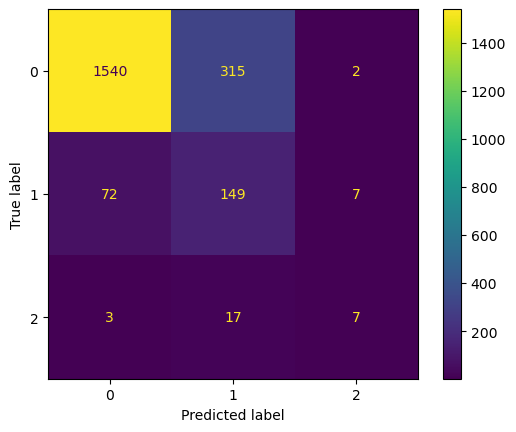

Recall:  0.803030303030303
ROC AUC:  0.7112345986156169
F1:  0.8295265884865402


In [110]:
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员特征筛选后-心理健康数据集.csv')
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康特征筛选后-共同特征-数据集.csv')
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-共同特征-数据集.csv')
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集抑郁类别70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集抑郁类别30.csv')

data = data.drop(['anxiety', 'suicide'], axis=1)
y = data['depression']
X = data.drop('depression', axis=1)
print(Counter(y))

data_test = data_test.drop(['anxiety', 'suicide'], axis=1)
y_test = data_test['depression']
X_test = data_test.drop('depression', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20)
X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=160,random_state=20)
rfc.fit(X_res, y_res)
#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/depression_model_after_smoteenn_intersection.joblib')

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)





Counter({0.0: 2655, 1.0: 1937, 2.0: 257, 3.0: 81})
测试数据: Counter({0.0: 1137, 1.0: 830, 2.0: 110, 3.0: 34})
resample后数据: Counter({3.0: 2655, 2.0: 2638, 0.0: 1285, 1.0: 1189})
Accuracy: 70.68
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      1137
         1.0       0.65      0.65      0.65       830
         2.0       0.27      0.44      0.34       110
         3.0       0.39      0.38      0.39        34

    accuracy                           0.71      2111
   macro avg       0.54      0.56      0.55      2111
weighted avg       0.72      0.71      0.71      2111



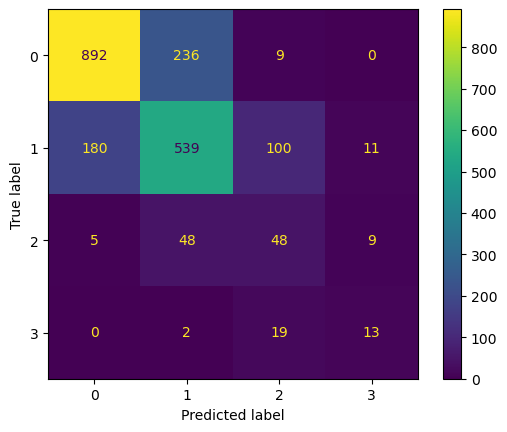

Recall:  0.7067740407389863
ROC AUC:  0.720729509158245
F1:  0.7138412824726582


In [162]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集焦虑类别70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集焦虑类别30.csv')

data = data.drop(['depression', 'suicide'], axis=1)
y = data['anxiety']
X = data.drop('anxiety', axis=1)
print(Counter(y))

data_test = data_test.drop(['depression', 'suicide'], axis=1)
y_test = data_test['anxiety']
X_test = data_test.drop('anxiety', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20)
X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_res, y_res)
#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/anxiety_model_after_smoteenn_intersection.joblib')

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)






Counter({1.0: 4592, 0.0: 337})
测试数据: Counter({1.0: 1968, 0.0: 144})
resample后数据: Counter({0.0: 4569, 1.0: 2844})
Counter({1.0: 1968, 0.0: 144})
Accuracy: 83.81
              precision    recall  f1-score   support

         0.0       0.21      0.51      0.30       144
         1.0       0.96      0.86      0.91      1968

    accuracy                           0.84      2112
   macro avg       0.59      0.69      0.61      2112
weighted avg       0.91      0.84      0.87      2112



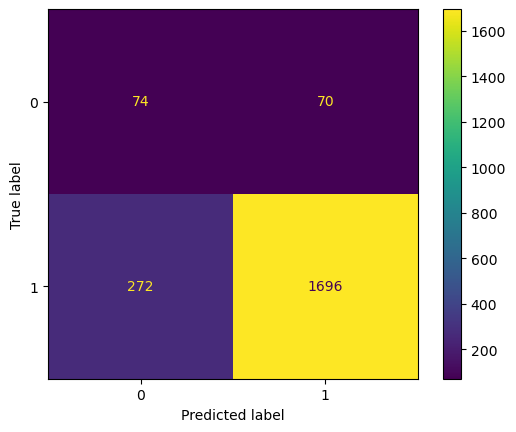

Recall:  0.8380681818181818
ROC AUC:  0.6878387533875339
F1:  0.8670659128919134


In [157]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集自杀倾向70.csv')
data_test = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集自杀倾向30.csv')

data = data.drop(['depression', 'anxiety'], axis=1)
y = data['suicide']
X = data.drop('suicide', axis=1)
print(Counter(y))

data_test = data_test.drop(['depression', 'anxiety'], axis=1)
y_test = data_test['suicide']
X_test = data_test.drop('suicide', axis=1)
print("测试数据:",Counter(y_test))

cc = SMOTEENN(random_state=20,sampling_strategy="all")
# cc = SMOTE(random_state=42)

X_res, y_res = cc.fit_resample(X, y)
print("resample后数据:", Counter(y_res))
rfc = RandomForestClassifier(n_estimators=150,random_state=20)
rfc.fit(X_res, y_res)

#save model
joblib.dump(rfc, '/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/model/suicide_model_after_smoteenn_intersection.joblib')
print(Counter(y_test))
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b)

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)






Resmaple后数据: Counter({2.0: 2670, 1.0: 2669, 3.0: 2653, 0.0: 2649})
预测数据: Counter({0.0: 1143, 1.0: 831, 2.0: 103, 3.0: 36})
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      1143
         1.0       0.65      0.71      0.68       831
         2.0       0.44      0.31      0.36       103
         3.0       0.58      0.50      0.54        36

    accuracy                           0.73      2113
   macro avg       0.62      0.58      0.60      2113
weighted avg       0.73      0.73      0.73      2113

Recall: 0.73 Accuracy: 72.83


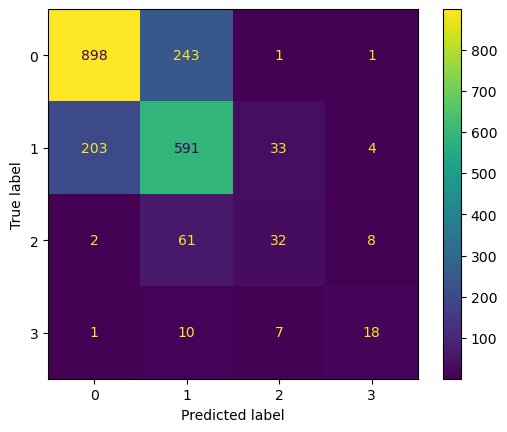

ROC AUC:  0.7279455965387729
F1:  0.7270191895613018


ValueError: continuous target data is not supported with label binarization

In [228]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集特征-数据集.csv')
from sklearn.preprocessing import label_binarize

# data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

y = data['anxiety']
X = data.drop('anxiety', axis=1)

# y = data['suicide']
# X = data.drop('suicide', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
cc = ADASYN(random_state=42) ###0.7279455
# cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x_train,y_train)
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("Resmaple后数据:",Counter(y_res))
brfc = RandomForestClassifier(random_state=42, n_estimators=200)
brfc.fit(X_res, y_res)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'roc_auc': make_scorer(roc_auc_score, average='ovo')}
# Perform 5-fold cross-validation on the model
cv = StratifiedKFold(n_splits=3)

# cv_results = cross_validate(brfc, X, y, cv=cv, scoring=scoring)
# print(cv_results)
# # Print the average score for each metric
# print(cv_results['test_accuracy'])
# print(cv_results['test_precision'])
# print(cv_results['test_recall'])
# print(cv_results['test_f1'])
# roc_auc_scores = cv_results['test_roc_auc']
# print(roc_auc_scores)




Resmaple后数据: Counter({1.0: 4444, 2.0: 4362, 0.0: 4350})
预测数据: Counter({0.0: 1840, 1.0: 240, 2.0: 33})
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1840
         1.0       0.41      0.25      0.31       240
         2.0       0.60      0.27      0.37        33

    accuracy                           0.87      2113
   macro avg       0.64      0.50      0.54      2113
weighted avg       0.84      0.87      0.85      2113

Recall: 0.87 Accuracy: 86.84


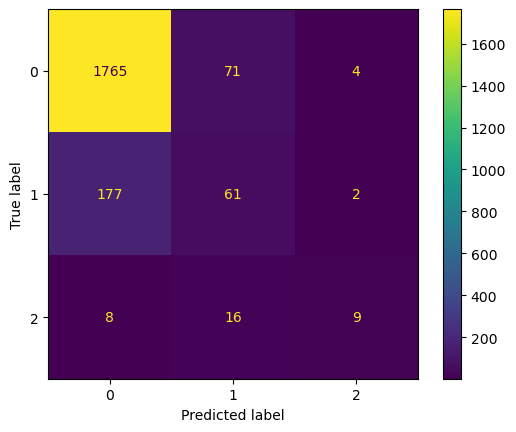

ROC AUC:  0.626523871767639
F1:  0.8526322785598738
{'fit_time': array([1.20063186, 1.21673298, 1.19050193]), 'score_time': array([0.10065508, 0.09932899, 0.10085011]), 'test_accuracy': array([0.8853856 , 0.8853856 , 0.88794205]), 'test_precision': array([0.851417  , 0.85347085, 0.85953991]), 'test_recall': array([0.8853856 , 0.8853856 , 0.88794205]), 'test_f1': array([0.85749086, 0.85710888, 0.8622405 ]), 'test_roc_auc': array([nan, nan, nan])}
[0.8853856  0.8853856  0.88794205]
[0.851417   0.85347085 0.85953991]
[0.8853856  0.8853856  0.88794205]
[0.85749086 0.85710888 0.8622405 ]
[nan nan nan]


In [219]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集特征-数据集.csv')

data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

y = data['depression']
X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

# y = data['suicide']
# X = data.drop('suicide', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
cc = ADASYN(random_state=42) ###0.7279455
# cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x_train,y_train)
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("Resmaple后数据:",Counter(y_res))
brfc = RandomForestClassifier(random_state=42, n_estimators=200)
brfc.fit(X_res, y_res)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'roc_auc': make_scorer(roc_auc_score, average='ovo')}
# Perform 5-fold cross-validation on the model
cv = StratifiedKFold(n_splits=3)

cv_results = cross_validate(brfc, X, y, cv=cv, scoring=scoring)
# Print the average score for each metric
print(cv_results['test_accuracy'])
print(cv_results['test_precision'])
print(cv_results['test_recall'])
print(cv_results['test_f1'])
roc_auc_scores = cv_results['test_roc_auc']
print(roc_auc_scores)


Resmaple后数据: Counter({0.0: 4625, 1.0: 4599})
预测数据: Counter({1.0: 1961, 0.0: 152})
              precision    recall  f1-score   support

         0.0       0.35      0.05      0.09       152
         1.0       0.93      0.99      0.96      1961

    accuracy                           0.92      2113
   macro avg       0.64      0.52      0.53      2113
weighted avg       0.89      0.92      0.90      2113

Recall: 0.92 Accuracy: 92.48


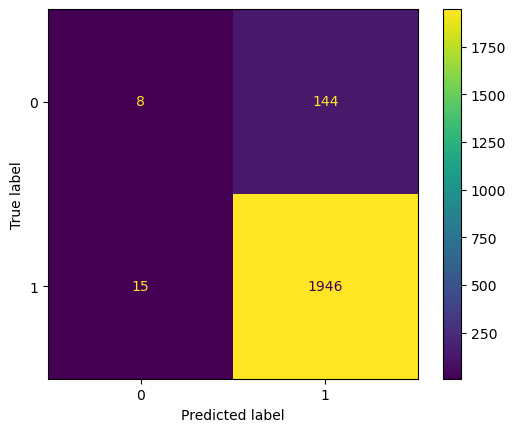

ROC AUC:  0.5224912101774069
F1:  0.8982152105980371
Accuracy:  0.9314020259371573
Precision:  0.9328983918197904
Recall:  0.9981707317073172
F1 score:  0.9644307673895222


In [194]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集特征-数据集.csv')

# data = data.drop(['anxiety', 'suicide'], axis=1)
data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

y = data['suicide']
X = data.drop('suicide', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
cc = ADASYN(random_state=42) ###0.7279455
# cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x_train,y_train)
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("Resmaple后数据:",Counter(y_res))
brfc = RandomForestClassifier(random_state=42, n_estimators=200)
brfc.fit(X_res, y_res)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc, X, y, cv=5, scoring=scoring)

# Print the average score for each metric
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 score: ", cv_results['test_f1'].mean())



Counter({1.0: 4599, 0.0: 329})
              precision    recall  f1-score   support

         0.0       0.23      0.47      0.30       152
         1.0       0.95      0.88      0.91      1961

    accuracy                           0.85      2113
   macro avg       0.59      0.67      0.61      2113
weighted avg       0.90      0.85      0.87      2113

Recall: 0.85 Accuracy: 72.83


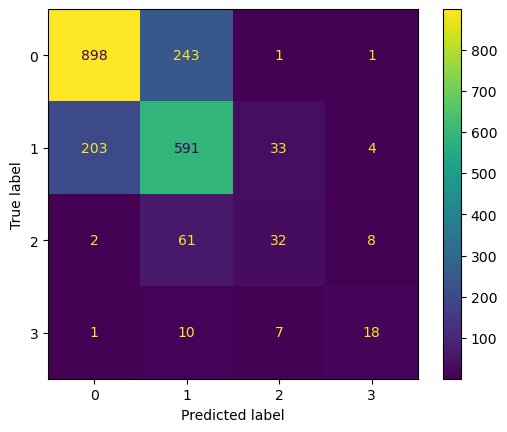

ROC AUC:  0.6715944469792533
F1:  0.870013161066011


In [173]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康SMOTEENN特征筛选后-交集特征-数据集.csv')

# data = data.drop(['anxiety', 'suicide'], axis=1)
data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

y = data['suicide']
X = data.drop('suicide', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
clf2 = LogisticRegression(class_weight='balanced', random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# define ensemble classifier
estimators = [('dt', clf1), ('lr', clf2), ('rf', clf3)]
ensemble = VotingClassifier(estimators=estimators, voting='soft')

# fit ensemble classifier on the imbalanced dataset
ensemble.fit(x_train, y_train)
print(Counter(y_train))
# evaluate the ensemble classifier on the imbalanced dataset
y_pred = ensemble.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('ROC AUC: ', roc_auc)
print('F1: ', f1)